<a href="https://colab.research.google.com/github/SaiArjunSairamje/Python_Libraries/blob/main/Pandas_4%20(Dataset%3A%20Pharma_Experiment_Analysis)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries & Dataset**
***

In [45]:
!gdown 173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ

Downloading...
From: https://drive.google.com/uc?id=173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ
To: /content/Pfizer_1.csv
100% 1.51k/1.51k [00:00<00:00, 4.75MB/s]


In [46]:
import numpy as np
import pandas as pd

In [47]:
data = pd.read_csv("Pfizer_1.csv")

In [48]:
data.head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Drug_Name  18 non-null     object 
 2   Parameter  18 non-null     object 
 3   1:30:00    16 non-null     float64
 4   2:30:00    16 non-null     float64
 5   3:30:00    12 non-null     float64
 6   4:30:00    14 non-null     float64
 7   5:30:00    16 non-null     float64
 8   6:30:00    18 non-null     int64  
 9   7:30:00    16 non-null     float64
 10  8:30:00    14 non-null     float64
 11  9:30:00    16 non-null     float64
 12  10:30:00   18 non-null     int64  
 13  11:30:00   16 non-null     float64
 14  12:30:00   18 non-null     int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 2.2+ KB


# **What we will learn ???**
***

> **(1) Convert wide-format to long-format `(i.e. Unpivot Columns to Rows)`**

> **(2) How to handle missing values `(i.e. the NaN values)`**

# **(1)  Convert wide-format to long-format**

**How to convert wide-format data into long-format date (i.e. transpose column to row) ???**

The **pd.melt()** function in **pandas** is used to transform a DataFrame from a **wide format** to a **long format**. It **unpivots the DataFrame**, making it easier to analyze or visualize the data.

Here's the basic syntax of the **pd.melt()** function:

> **`pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', ...)`**

**Parameters:**

* **frame**: The DataFrame to be melted.
* **id_vars**: Columns to use as identifier variables (remains as columns in the result).
* **value_vars**: Columns to unpivot. If not specified, all columns not set as **id_vars** will be unpivoted.
* **var_name**: Name to use for the variable column. By default, it is set to **'variable'**.
* **value_name**: Name to use for the value column. By default, it is set to **'value'**.
* Additional parameters for handling data types, sorting, etc.

The pd.melt() function is helpful when you have a DataFrame with multiple columns, and you want to transform it into a long format for further analysis or visualization.








In [50]:
data.head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20


In [51]:
#id_vars - it's the column's that you don't want to change...

pd.melt(data, id_vars = ["Date", "Parameter", "Drug_Name"])

,Date,Parameter,Drug_Name,variable,value
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,Pressure,diltiazem hydrochloride,12:30:00,14.0
212,17-10-2020,Temperature,docetaxel injection,12:30:00,23.0
213,17-10-2020,Pressure,docetaxel injection,12:30:00,28.0
214,17-10-2020,Temperature,ketamine hydrochloride,12:30:00,24.0


### **How to change the "variable" & "value" column names as per my choice ???**

In [52]:
pd.melt(data,
        id_vars = ["Date", "Parameter", "Drug_Name"],    #id_vars - it's the column's that you don't want to change
        var_name = "time",     #var_name - it will change the "variable" column name to "time"
        value_name = "reading"     #value_name - it will change the "value" column name to "value_name"
        )

,Date,Parameter,Drug_Name,time,reading
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,Pressure,diltiazem hydrochloride,12:30:00,14.0
212,17-10-2020,Temperature,docetaxel injection,12:30:00,23.0
213,17-10-2020,Pressure,docetaxel injection,12:30:00,28.0
214,17-10-2020,Temperature,ketamine hydrochloride,12:30:00,24.0


In [53]:
# storing the data into a new variable so that we can retain the original data as it is...

data_melt = pd.melt(data,
        id_vars = ["Date", "Parameter", "Drug_Name"],
        var_name = "time",
        value_name = "reading"
        )

In [54]:
data_melt.head()

,Date,Parameter,Drug_Name,time,reading
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0


### **How to convert back from long-format data into white-format date (i.e. transpose row to column) ???**

The **pivot()** function in pandas is used to reshape a DataFrame from **long format** to **wide format**. It is particularly useful when you want to convert data that has been **melted** or **unpivoted** back to its original structure.

Here's the basic syntax of the **pivot()** function:

> **`DataFrame.pivot(index=None, columns=None, values=None)`**

**Parameters:**

* **index**: The column to be used as the index in the pivoted DataFrame. It can be a column label, column name, or a list of column labels/names. If not specified, the index will be auto-generated.
* **columns**: The column to be used as the columns in the pivoted DataFrame. It can be a column label, column name, or a list of column labels/names.
values: The column to be used as the values in the pivoted DataFrame. It specifies the values to be populated in the new columns based on the index and * **columns**. It can be a column label, column name, or a list of column labels/names.

The **pivot()** function is a convenient way to reshape data from long to wide format in pandas.








In [55]:
#long ==> wide

In [56]:
data_tidy = data_melt.pivot(index = ["Date" , "Drug_Name" , "Parameter"],  #index - it's the column's that you don't want to change
                columns = "time",     #columns - the column that you want to be changed as header
                values = "reading"    #values -
                )

In [57]:
data_tidy

time                                            10:30:00  11:30:00  12:30:00  \
Date       Drug_Name               Parameter                                   
15-10-2020 diltiazem hydrochloride Pressure         18.0      19.0      20.0   
                                   Temperature      20.0      20.0      21.0   
           docetaxel injection     Pressure         26.0      29.0      28.0   
                                   Temperature      23.0      25.0      25.0   
           ketamine hydrochloride  Pressure          9.0       9.0      11.0   
                                   Temperature      22.0      21.0      20.0   
16-10-2020 diltiazem hydrochloride Pressure         24.0       NaN      27.0   
                                   Temperature      40.0       NaN      42.0   
           docetaxel injection     Pressure         28.0      29.0      30.0   
                                   Temperature      56.0      57.0      58.0   
           ketamine hydrochloride  Pressure         16.0      17.0      18.0   
                                   Temperature      13.0      14.0      15.0   
17-10-2020 diltiazem hydrochloride Pressure         11.0      13.0      14.0   
                                   Temperature      14.0      11.0      10.0   
           docetaxel injection     Pressure         28.0      29.0      28.0   
                                   Temperature      21.0      22.0      23.0   
           ketamine hydrochloride  Pressure         13.0      14.0      15.0   
                                   Temperature      22.0      23.0      24.0   

time                                            1:30:00  2:30:00  3:30:00  \
Date       Drug_Name               Parameter                                
15-10-2020 diltiazem hydrochloride Pressure        12.0     13.0      NaN   
                                   Temperature     23.0     22.0      NaN   
           docetaxel injection     Pressure         NaN     22.0     22.0   
                                   Temperature      NaN     17.0     18.0   
           ketamine hydrochloride  Pressure         8.0      NaN      NaN   
                                   Temperature     24.0      NaN      NaN   
16-10-2020 diltiazem hydrochloride Pressure        18.0     19.0     20.0   
                                   Temperature     34.0     35.0     36.0   
           docetaxel injection     Pressure        23.0     24.0      NaN   
                                   Temperature     46.0     47.0      NaN   
           ketamine hydrochloride  Pressure        12.0     12.0     13.0   
                                   Temperature      8.0      9.0     10.0   
17-10-2020 diltiazem hydrochloride Pressure         3.0      4.0      4.0   
                                   Temperature     20.0     19.0     19.0   
           docetaxel injection     Pressure        20.0     22.0     22.0   
                                   Temperature     12.0     13.0     14.0   
           ketamine hydrochloride  Pressure         8.0      9.0     10.0   
                                   Temperature     13.0     14.0     15.0   

time                                            4:30:00  5:30:00  6:30:00  \
Date       Drug_Name               Parameter                                
15-10-2020 diltiazem hydrochloride Pressure        11.0     13.0     14.0   
                                   Temperature     21.0     21.0     22.0   
           docetaxel injection     Pressure         NaN     22.0     23.0   
                                   Temperature      NaN     17.0     18.0   
           ketamine hydrochloride  Pressure         7.0      NaN      9.0   
                                   Temperature     27.0      NaN     26.0   
16-10-2020 diltiazem hydrochloride Pressure        21.0     22.0     23.0   
                                   Temperature     36.0     37.0     38.0   
           docetaxel injection     Pressure        25.0     26.0     27.0   
           

In [58]:
data_tidy = data_tidy.reset_index() #adjusted the "time" subheading as shown above

In [59]:
data_tidy.head()  #NOTE: the "time" column is nothing but the index column

time,Date,Drug_Name,Parameter,10:30:00,11:30:00,12:30:00,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00
0,15-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,12.0,13.0,NaN,11.0,13.0,14.0,16.0,16.0,24.0
1,15-10-2020,diltiazem hydrochloride,Temperature,20.0,20.0,21.0,23.0,22.0,NaN,21.0,21.0,22.0,23.0,21.0,22.0
2,15-10-2020,docetaxel injection,Pressure,26.0,29.0,28.0,NaN,22.0,22.0,NaN,22.0,23.0,NaN,NaN,27.0
3,15-10-2020,docetaxel injection,Temperature,23.0,25.0,25.0,NaN,17.0,18.0,NaN,17.0,18.0,NaN,NaN,23.0
4,15-10-2020,ketamine hydrochloride,Pressure,9.0,9.0,11.0,8.0,NaN,NaN,7.0,NaN,9.0,10.0,11.0,10.0


In [60]:
data_tidy.info()  #as you can see, you won't see the "time" index column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Drug_Name  18 non-null     object 
 2   Parameter  18 non-null     object 
 3   10:30:00   18 non-null     float64
 4   11:30:00   16 non-null     float64
 5   12:30:00   18 non-null     float64
 6   1:30:00    16 non-null     float64
 7   2:30:00    16 non-null     float64
 8   3:30:00    12 non-null     float64
 9   4:30:00    14 non-null     float64
 10  5:30:00    16 non-null     float64
 11  6:30:00    18 non-null     float64
 12  7:30:00    16 non-null     float64
 13  8:30:00    14 non-null     float64
 14  9:30:00    16 non-null     float64
dtypes: float64(12), object(3)
memory usage: 2.2+ KB


In [61]:
#NOTE: Just trying to see if we can remove the "time" index column

data_tidy.columns.name = "None"

In [62]:
data_tidy.head()

None,Date,Drug_Name,Parameter,10:30:00,11:30:00,12:30:00,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00
0,15-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,12.0,13.0,NaN,11.0,13.0,14.0,16.0,16.0,24.0
1,15-10-2020,diltiazem hydrochloride,Temperature,20.0,20.0,21.0,23.0,22.0,NaN,21.0,21.0,22.0,23.0,21.0,22.0
2,15-10-2020,docetaxel injection,Pressure,26.0,29.0,28.0,NaN,22.0,22.0,NaN,22.0,23.0,NaN,NaN,27.0
3,15-10-2020,docetaxel injection,Temperature,23.0,25.0,25.0,NaN,17.0,18.0,NaN,17.0,18.0,NaN,NaN,23.0
4,15-10-2020,ketamine hydrochloride,Pressure,9.0,9.0,11.0,8.0,NaN,NaN,7.0,NaN,9.0,10.0,11.0,10.0


### **For a given date, for a given time, and for a perticular drug_name, I want to the have 2 values as it's column namely temperature and pressure.**

**Example of the expected o/p table**

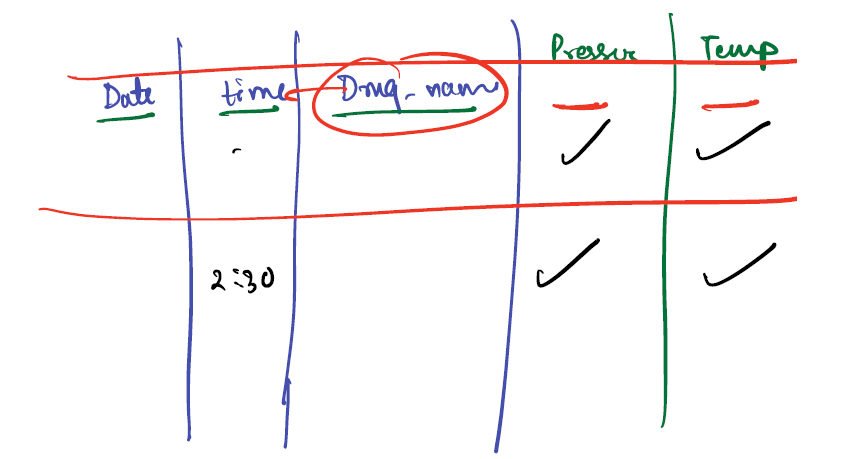


In [63]:
data_melt.head()

,Date,Parameter,Drug_Name,time,reading
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0


In [64]:
data_tidy = data_melt.pivot(
    index = ["Date", "time", "Drug_Name"],
    columns = "Parameter",
    values = "reading"
)

In [65]:
data_tidy.head(15)  #we're getting o/p where at a given time, what drug_name and its pressure and temperature value are...

Parameter                                    Pressure  Temperature
Date       time     Drug_Name                                     
15-10-2020 10:30:00 diltiazem hydrochloride      18.0         20.0
                    docetaxel injection          26.0         23.0
                    ketamine hydrochloride        9.0         22.0
           11:30:00 diltiazem hydrochloride      19.0         20.0
                    docetaxel injection          29.0         25.0
                    ketamine hydrochloride        9.0         21.0
           12:30:00 diltiazem hydrochloride      20.0         21.0
                    docetaxel injection          28.0         25.0
                    ketamine hydrochloride       11.0         20.0
           1:30:00  diltiazem hydrochloride      12.0         23.0
                    docetaxel injection           NaN          NaN
                    ketamine hydrochloride        8.0         24.0
           2:30:00  diltiazem hydrochloride      13.0         22.0
                    docetaxel injection          22.0         17.0
                    ketamine hydrochloride        NaN          NaN

In [66]:
data_tidy.reset_index()  #adjusting the "Parameter" subheading as the index column

Parameter,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0
...,...,...,...,...,...
103,17-10-2020,8:30:00,docetaxel injection,26.0,19.0
104,17-10-2020,8:30:00,ketamine hydrochloride,11.0,20.0
105,17-10-2020,9:30:00,diltiazem hydrochloride,9.0,13.0
106,17-10-2020,9:30:00,docetaxel injection,27.0,20.0


# **List Comprehension**
***

**List comprehension** is a concise and efficient way to create new lists by performing operations on existing lists or other iterables. It allows you to combine loops, conditions, and expressions into a single line of code.

Here's the general syntax of a **list comprehension**:

> **`new_list = [expression for item in iterable if condition]`**

**Components of list comprehension:**

* **expression**: The expression that defines how each item in the iterable is transformed or manipulated to create a new element in the new list.
* **item**: The variable that represents each item in the iterable.
* **iterable**: The existing list, tuple, string, or any other iterable from which you want to create a new list.
* **condition** (optional): An optional condition that filters the items from the iterable based on a specified condition. Only the items that satisfy the condition are included in the new list.

### **Given a list of elements, give me the cube of these elements**

> **`Approach (1):`** Normal **Python code**

> **`Approach (2):`** Using **"List compreshension"**

In [67]:
a = [4, 7, 3]
# b = [16, 49, 9]

In [68]:
# Approach (1): Normal Python code Approach

a = [4, 7, 3]

b = []

for elem in a:
  b.append(elem**2)

print(b)

[16, 49, 9]


In [69]:
# Approach (2): Using List Comprehension Approach

b = [elem**2 for elem in a]

In [70]:
print(b)

[16, 49, 9]


**`Another example:  `**   
**Given a list, provide a new list which stores twice the value of the previous list elements.**

In [71]:
a = [4, 7, 3]

In [72]:
b = [elem*2 for elem in a]

In [73]:
print(b)

[8, 14, 6]


### **"If" statement using "List Comprehension"**

**Given a new list, create a new list where you strore every element except 5 in the same sequence**

In [74]:
a = [4, 7, 5, 9, 3]
#create a new list where you strore every element except 5 in the same sequence
# b = [4, 7, 9, 3]

In [75]:
b = [elem for elem in a if elem != 5]

In [76]:
print(b)

[4, 7, 9, 3]


### **"If-else" statement using "List Comprehension"**

**Given a list, create a new list which stores the number as it is if it is even and stores the double of it, if it is odd**

> **`Approach (1):`** Normal **Python code**

> **`Approach (2):`** Using **"If-else"** stetement in **"List compreshension"**

In [77]:
#if-else

In [78]:
#Given a list, create a new list which stores the number as it is if it is even and stores the double of it, if it is odd

a = [4, 7, 5, 8, 9]
# b = [4, 14, 10, 8, 18]

In [79]:
# Approach (1): Normal Python code

a = [4, 7, 5, 8, 9]

b = []

for elem in a:
  if elem%2 == 0:
    b.append(elem)
  else:
    b.append(2*elem)

print(b)

[4, 14, 10, 8, 18]


In [80]:
# Approach (2): Using "If-else" stetement in "List compreshension"

b = [elem if elem%2 == 0 else elem*2 for elem in a]

In [81]:
print(b)

[4, 14, 10, 8, 18]


# **Continue with next lecture**
***

As per our data, for a particular **drug_name**, for a particular **date**, there are **multiple timeframes** that has **temperature** and **pressure** data.


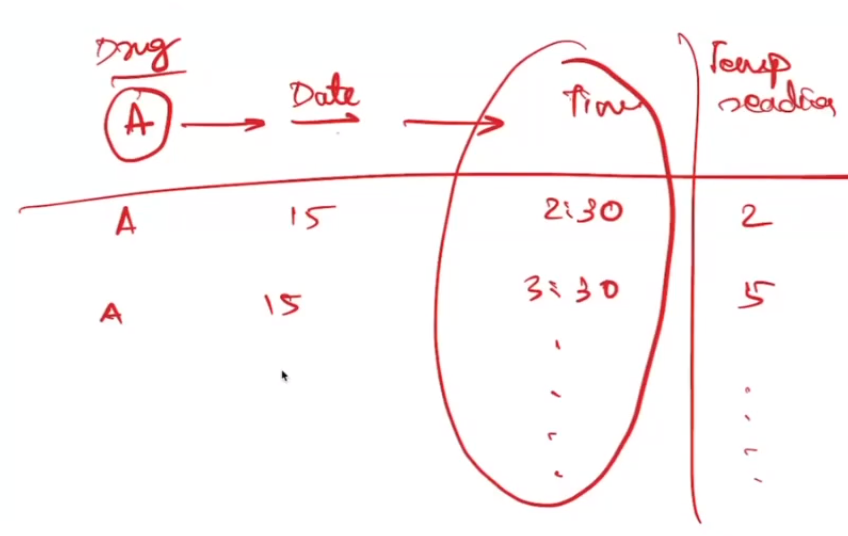

### **For a particular drug_name and particular date, give me the average temperature ???**

**Expected o/p**

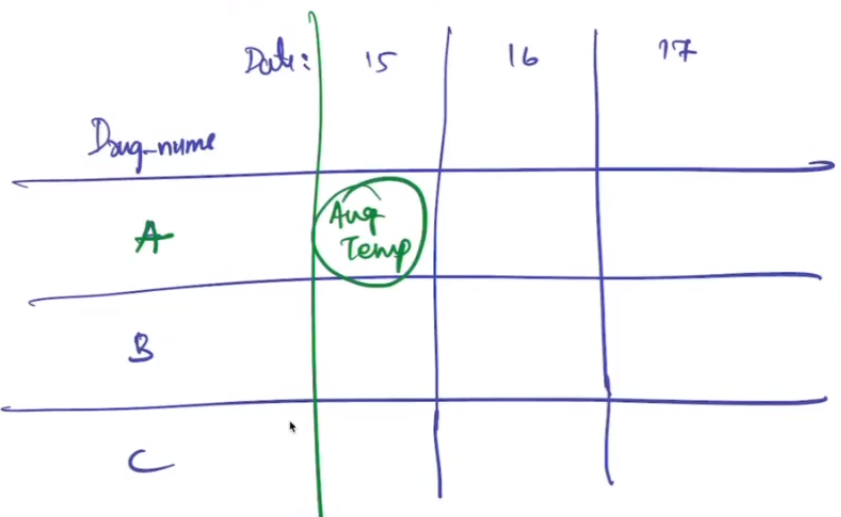

So far we had been using the **"pivot()"** function, but we will now use **"pivot_table()"** for **aggregating** the function.

The **pivot_table()** function in **Pandas** is used to create a spreadsheet-style pivot table based on a DataFrame object. It allows you to summarize and aggregate data in a customizable way. Compared to the **pivot()** function, **pivot_table()** provides additional flexibility and functionality for aggregating data.

Here's the general syntax of the **pivot_table()** function:

> `**pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True)**`

Let's go through the parameters commonly used with **pivot_table()**:

* **data**: The DataFrame object containing the data.
* **values**: (Optional) The column(s) to aggregate. By default, it considers all numeric columns.
* **index**: (Optional) The column(s) to use as index in the resulting pivot table.
* **columns**: (Optional) The column(s) to use as columns in the resulting pivot table.
* **aggfunc**: (Optional) The aggregation function to apply to the values. It can be a built-in aggregator like 'sum', 'mean', 'count', etc., or a custom function.
* **fill_value**: (Optional) The value to replace missing values with.
* **margins**: (Optional) If True, it adds row and column totals to the pivot table.
* **dropna**: (Optional) If True, it excludes columns that have all NaN values.

In [82]:
data_tidy.head(20)

Parameter                                    Pressure  Temperature
Date       time     Drug_Name                                     
15-10-2020 10:30:00 diltiazem hydrochloride      18.0         20.0
                    docetaxel injection          26.0         23.0
                    ketamine hydrochloride        9.0         22.0
           11:30:00 diltiazem hydrochloride      19.0         20.0
                    docetaxel injection          29.0         25.0
                    ketamine hydrochloride        9.0         21.0
           12:30:00 diltiazem hydrochloride      20.0         21.0
                    docetaxel injection          28.0         25.0
                    ketamine hydrochloride       11.0         20.0
           1:30:00  diltiazem hydrochloride      12.0         23.0
                    docetaxel injection           NaN          NaN
                    ketamine hydrochloride        8.0         24.0
           2:30:00  diltiazem hydrochloride      13.0         22.0
                    docetaxel injection          22.0         17.0
                    ketamine hydrochloride        NaN          NaN
           3:30:00  diltiazem hydrochloride       NaN          NaN
                    docetaxel injection          22.0         18.0
                    ketamine hydrochloride        NaN          NaN
           4:30:00  diltiazem hydrochloride      11.0         21.0
                    docetaxel injection           NaN          NaN

In [83]:
data_tidy.reset_index()

Parameter,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0
...,...,...,...,...,...
103,17-10-2020,8:30:00,docetaxel injection,26.0,19.0
104,17-10-2020,8:30:00,ketamine hydrochloride,11.0,20.0
105,17-10-2020,9:30:00,diltiazem hydrochloride,9.0,13.0
106,17-10-2020,9:30:00,docetaxel injection,27.0,20.0


In [84]:
data_tidy.head(20)

Parameter                                    Pressure  Temperature
Date       time     Drug_Name                                     
15-10-2020 10:30:00 diltiazem hydrochloride      18.0         20.0
                    docetaxel injection          26.0         23.0
                    ketamine hydrochloride        9.0         22.0
           11:30:00 diltiazem hydrochloride      19.0         20.0
                    docetaxel injection          29.0         25.0
                    ketamine hydrochloride        9.0         21.0
           12:30:00 diltiazem hydrochloride      20.0         21.0
                    docetaxel injection          28.0         25.0
                    ketamine hydrochloride       11.0         20.0
           1:30:00  diltiazem hydrochloride      12.0         23.0
                    docetaxel injection           NaN          NaN
                    ketamine hydrochloride        8.0         24.0
           2:30:00  diltiazem hydrochloride      13.0         22.0
                    docetaxel injection          22.0         17.0
                    ketamine hydrochloride        NaN          NaN
           3:30:00  diltiazem hydrochloride       NaN          NaN
                    docetaxel injection          22.0         18.0
                    ketamine hydrochloride        NaN          NaN
           4:30:00  diltiazem hydrochloride      11.0         21.0
                    docetaxel injection           NaN          NaN

In [85]:
data_tidy = data_tidy.reset_index()

In [86]:
data_tidy.pivot( index = ["Drug_Name"], columns = "Date", values = "Temperature")   #this will throw error message

ValueError: ignored

In [87]:
pd.pivot_table(data_tidy,
               index = "Drug_Name",
               columns = "Date",
               values = "Temperature",
               aggfunc = np.mean)

Date,15-10-2020,16-10-2020,17-10-2020
Drug_Name,,,
diltiazem hydrochloride,21.454545,37.454545,15.636364
docetaxel injection,20.750000,51.454545,17.500000
ketamine hydrochloride,23.555556,11.500000,18.500000


### **Difference b/w "pivot()" and "pivot_table()" ???**

The **pivot()** and **pivot_table()** functions in Pandas are both used to **reshape** and **restructure data.** However, there are some **differences** between them:

**1. Aggregation:** The main difference between **pivot()** and **pivot_table()** is that **pivot()** performs a simple **reshaping** of the data, while **pivot_table()** allows for **aggregating** the data during the **reshaping** process. With **pivot()**, you can only rearrange the data based on the specified index and column values. On the other hand, **pivot_table()** allows you to apply aggregation functions to the values in the resulting table.

**2. Handling Duplicate Values:** When using **pivot()**, if there are multiple values for a given combination of index and column, an error will be raised. In contrast, **pivot_table()** can handle duplicate values by applying an aggregation function (e.g., sum, mean, count) to consolidate them.

**3. Multiple Aggregations: pivot_table()** allows you to specify multiple aggregation functions for the same data column, which is not possible with **pivot()**. You can pass a list of aggregation functions to the aggfunc parameter of **pivot_table()**.

**4. Missing Values: pivot()** does not handle missing values explicitly. If there are missing values in the original DataFrame, they will be filled with **NaN** in the resulting pivot table. **pivot_table()** provides the fill_value parameter, which allows you to specify a value to replace missing values during the aggregation.

In summary, **pivot()** is useful for **reshaping data without any aggregation**, while **pivot_table()** is more versatile and allows for **aggregating data during the reshaping process**. If you need to summarize or aggregate your data based on specific criteria, **pivot_table()** is the preferred choice.







### **What if I want to have both the average temperature as well as the average pressure for each drug at particular time ???**

That is, we want to have 2 readings/metrics to measure the o/p...

**Expected o/p**

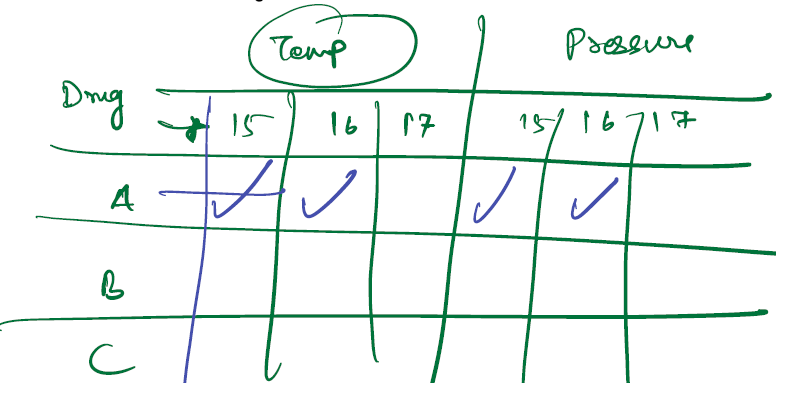

In [88]:
pd.pivot_table(data_tidy,
               index = "Drug_Name",
               columns = "Date",
               values = ["Temperature", "Pressure"],
               aggfunc = np.mean)

Parameter                 Pressure                       Temperature  \
Date                    15-10-2020 16-10-2020 17-10-2020  15-10-2020   
Drug_Name                                                              
diltiazem hydrochloride  16.000000  22.545455   7.727273   21.454545   
docetaxel injection      24.875000  27.000000  24.500000   20.750000   
ketamine hydrochloride    9.333333  14.800000  11.500000   23.555556   

Parameter                                      
Date                    16-10-2020 17-10-2020  
Drug_Name                                      
diltiazem hydrochloride  37.454545  15.636364  
docetaxel injection      51.454545  17.500000  
ketamine hydrochloride   11.500000  18.500000

In [89]:
#HW - explore above function with different aggregate functions

### **HW - explore above function with different aggregate functions**

**`NOTE:`** Used **ChatGPT** for the below data.

When using the **pivot_table()** function in **Pandas**, you can specify the desired **aggregation function(s)** using the **aggfunc** parameter. Here are some commonly used **aggregate functions** with **pivot_table()**:

* '**sum**': Computes the sum of values.     
* '**mean**': Calculates the mean (average) of values.        
* '**median**': Computes the median of values.       
* '**min**': Returns the minimum value.       
* '**max**': Returns the maximum value.       
* '**count**': Counts the number of non-null values.       
* '**std**': Computes the standard deviation.       
* '**var**': Calculates the variance.       
* '**prod**': Computes the product of values.       
* '**first**': Returns the first value.       
* '**last**': Returns the last value.       

You can specify a single aggregation function or a list of multiple aggregation functions. **Here's an example:**


In [154]:
import pandas as pd

# Create a DataFrame
data = {
    'City': ['New York', 'London', 'New York', 'London', 'London'],
    'Year': [2018, 2018, 2019, 2019, 2020],
    'Sales': [100, 200, 150, 250, 300]
}
df = pd.DataFrame(data)

# Create a pivot table with sum and mean aggregation
pivot = df.pivot_table(values='Sales', index='City', columns='Year', aggfunc=['sum', 'mean'])

print(pivot)

            sum                 mean              
Year       2018   2019   2020   2018   2019   2020
City                                              
London    200.0  250.0  300.0  200.0  250.0  300.0
New York  100.0  150.0    NaN  100.0  150.0    NaN


**`NOTE:`** In this example, the pivot table is created with both the sum and mean aggregations for the '**Sales**' column, grouped by '**City**' and '**Year**'.



# **(2) How to handle missing values**

In [90]:
data_tidy.head(20)

Parameter,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0
5,15-10-2020,11:30:00,ketamine hydrochloride,9.0,21.0
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.0,21.0
7,15-10-2020,12:30:00,docetaxel injection,28.0,25.0
8,15-10-2020,12:30:00,ketamine hydrochloride,11.0,20.0
9,15-10-2020,1:30:00,diltiazem hydrochloride,12.0,23.0


In [91]:
type(None)

NoneType

In [92]:
type(np.nan)

float

In [93]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [94]:
pd.Series([1, np.nan, 2])

0    1.0
1    NaN
2    2.0
dtype: float64

In [95]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [96]:
pd.Series(["Aditya", None, np.nan])

0    Aditya
1      None
2       NaN
dtype: object

In [97]:
#Dealing with missing values

In [98]:
data.head(10)

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20
5,15-10-2020,ketamine hydrochloride,Pressure,8.0,NaN,NaN,7.0,NaN,9,10.0,11.0,10.0,9,9.0,11
6,16-10-2020,diltiazem hydrochloride,Temperature,34.0,35.0,36.0,36.0,37.0,38,37.0,38.0,39.0,40,NaN,42
7,16-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,21.0,22.0,23,24.0,25.0,25.0,24,NaN,27
8,16-10-2020,docetaxel injection,Temperature,46.0,47.0,NaN,48.0,48.0,49,50.0,52.0,55.0,56,57.0,58
9,16-10-2020,docetaxel injection,Pressure,23.0,24.0,NaN,25.0,26.0,27,28.0,29.0,28.0,28,29.0,30


In [99]:
data.isna().head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False
3,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False


In [100]:
data.isnull().head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False
3,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False


In [101]:
pd.isnull

<function pandas.core.dtypes.missing.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>

In [102]:
pd.isna

<function pandas.core.dtypes.missing.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Drug_Name  18 non-null     object 
 2   Parameter  18 non-null     object 
 3   1:30:00    16 non-null     float64
 4   2:30:00    16 non-null     float64
 5   3:30:00    12 non-null     float64
 6   4:30:00    14 non-null     float64
 7   5:30:00    16 non-null     float64
 8   6:30:00    18 non-null     int64  
 9   7:30:00    16 non-null     float64
 10  8:30:00    14 non-null     float64
 11  9:30:00    16 non-null     float64
 12  10:30:00   18 non-null     int64  
 13  11:30:00   16 non-null     float64
 14  12:30:00   18 non-null     int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 2.2+ KB


In [104]:
data.isna().sum()

Date         0
Drug_Name    0
Parameter    0
1:30:00      2
2:30:00      2
3:30:00      6
4:30:00      4
5:30:00      2
6:30:00      0
7:30:00      2
8:30:00      4
9:30:00      2
10:30:00     0
11:30:00     2
12:30:00     0
dtype: int64

In [105]:
data.isna().sum(axis = 1)

0     1
1     1
2     4
3     4
4     3
5     3
6     1
7     1
8     1
9     1
10    2
11    2
12    1
13    1
14    0
15    0
16    0
17    0
dtype: int64

In [106]:
data.isna().sum(axis = 1)

0     1
1     1
2     4
3     4
4     3
5     3
6     1
7     1
8     1
9     1
10    2
11    2
12    1
13    1
14    0
15    0
16    0
17    0
dtype: int64

In [107]:
data.dropna()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
14,17-10-2020,docetaxel injection,Temperature,12.0,13.0,14.0,15.0,16.0,17,18.0,19.0,20.0,21,22.0,23
15,17-10-2020,docetaxel injection,Pressure,20.0,22.0,22.0,22.0,22.0,23,25.0,26.0,27.0,28,29.0,28
16,17-10-2020,ketamine hydrochloride,Temperature,13.0,14.0,15.0,16.0,17.0,18,19.0,20.0,21.0,22,23.0,24
17,17-10-2020,ketamine hydrochloride,Pressure,8.0,9.0,10.0,11.0,11.0,12,12.0,11.0,12.0,13,14.0,15


In [108]:
#HW - Explore - how to drop a row when only all the cells are null

In [109]:
data.dropna(axis = 1)

,Date,Drug_Name,Parameter,6:30:00,10:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,22,20,21
1,15-10-2020,diltiazem hydrochloride,Pressure,14,18,20
2,15-10-2020,docetaxel injection,Temperature,18,23,25
3,15-10-2020,docetaxel injection,Pressure,23,26,28
4,15-10-2020,ketamine hydrochloride,Temperature,26,22,20
5,15-10-2020,ketamine hydrochloride,Pressure,9,9,11
6,16-10-2020,diltiazem hydrochloride,Temperature,38,40,42
7,16-10-2020,diltiazem hydrochloride,Pressure,23,24,27
8,16-10-2020,docetaxel injection,Temperature,49,56,58
9,16-10-2020,docetaxel injection,Pressure,27,28,30


In [110]:
#break --> imputation

In [111]:
data.head(20)

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20
5,15-10-2020,ketamine hydrochloride,Pressure,8.0,NaN,NaN,7.0,NaN,9,10.0,11.0,10.0,9,9.0,11
6,16-10-2020,diltiazem hydrochloride,Temperature,34.0,35.0,36.0,36.0,37.0,38,37.0,38.0,39.0,40,NaN,42
7,16-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,21.0,22.0,23,24.0,25.0,25.0,24,NaN,27
8,16-10-2020,docetaxel injection,Temperature,46.0,47.0,NaN,48.0,48.0,49,50.0,52.0,55.0,56,57.0,58
9,16-10-2020,docetaxel injection,Pressure,23.0,24.0,NaN,25.0,26.0,27,28.0,29.0,28.0,28,29.0,30


In [112]:
data.fillna(0).head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,0.0,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,0.0,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,0.0,17.0,18.0,0.0,17.0,18,0.0,0.0,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,0.0,22.0,22.0,0.0,22.0,23,0.0,0.0,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,0.0,0.0,27.0,0.0,26,25.0,24.0,23.0,22,21.0,20


In [113]:
data.head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20


In [114]:
data["3:30:00"].fillna(0)

0      0.0
1      0.0
2     18.0
3     22.0
4      0.0
5      0.0
6     36.0
7     20.0
8      0.0
9      0.0
10    10.0
11    13.0
12    19.0
13     4.0
14    14.0
15    22.0
16    15.0
17    10.0
Name: 3:30:00, dtype: float64

In [115]:
mean_val = data["2:30:00"].mean()

In [116]:
data["2:30:00"]

0     22.0
1     13.0
2     17.0
3     22.0
4      NaN
5      NaN
6     35.0
7     19.0
8     47.0
9     24.0
10     9.0
11    12.0
12    19.0
13     4.0
14    13.0
15    22.0
16    14.0
17     9.0
Name: 2:30:00, dtype: float64

In [117]:
data["2:30:00"].fillna(mean_val)

0     22.0000
1     13.0000
2     17.0000
3     22.0000
4     18.8125
5     18.8125
6     35.0000
7     19.0000
8     47.0000
9     24.0000
10     9.0000
11    12.0000
12    19.0000
13     4.0000
14    13.0000
15    22.0000
16    14.0000
17     9.0000
Name: 2:30:00, dtype: float64

In [118]:
data["2:30:00"].fillna(data["2:30:00"].mean())

0     22.0000
1     13.0000
2     17.0000
3     22.0000
4     18.8125
5     18.8125
6     35.0000
7     19.0000
8     47.0000
9     24.0000
10     9.0000
11    12.0000
12    19.0000
13     4.0000
14    13.0000
15    22.0000
16    14.0000
17     9.0000
Name: 2:30:00, dtype: float64

In [119]:
data_tidy.head(20)

Parameter,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0
5,15-10-2020,11:30:00,ketamine hydrochloride,9.0,21.0
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.0,21.0
7,15-10-2020,12:30:00,docetaxel injection,28.0,25.0
8,15-10-2020,12:30:00,ketamine hydrochloride,11.0,20.0
9,15-10-2020,1:30:00,diltiazem hydrochloride,12.0,23.0


In [120]:
def temp_mean(df):

  df["Temp_avg"] = df["Temperature"].mean()
  return df

In [121]:
data_tidy = data_tidy.groupby("Drug_Name").apply(temp_mean)

<ipython-input-121-c6c3814aad63>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_tidy = data_tidy.groupby("Drug_Name").apply(temp_mean)


In [122]:
data_tidy.head(20)

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0,24.848485
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0,30.387097
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0,17.709677
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0,24.848485
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0,30.387097
5,15-10-2020,11:30:00,ketamine hydrochloride,9.0,21.0,17.709677
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.0,21.0,24.848485
7,15-10-2020,12:30:00,docetaxel injection,28.0,25.0,30.387097
8,15-10-2020,12:30:00,ketamine hydrochloride,11.0,20.0,17.709677
9,15-10-2020,1:30:00,diltiazem hydrochloride,12.0,23.0,24.848485


In [123]:
data_tidy["Temperature"].fillna(data_tidy["Temp_avg"], inplace = True)

In [124]:
data_tidy.head(20)

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.000000,24.848485
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.000000,30.387097
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.000000,17.709677
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.000000,24.848485
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.000000,30.387097
5,15-10-2020,11:30:00,ketamine hydrochloride,9.0,21.000000,17.709677
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.0,21.000000,24.848485
7,15-10-2020,12:30:00,docetaxel injection,28.0,25.000000,30.387097
8,15-10-2020,12:30:00,ketamine hydrochloride,11.0,20.000000,17.709677
9,15-10-2020,1:30:00,diltiazem hydrochloride,12.0,23.000000,24.848485


In [125]:
#HW - check this code

def pr_mean(x):
  x['Pressure_avg'] = x['Pressure'].mean()
  return x


data_tidy=data_tidy.groupby(["Drug_Name"]).apply(pr_mean)
data_tidy['Pressure'].fillna(data_tidy["Pressure_avg"], inplace=True)
data_tidy
data_tidy.isna().sum()

<ipython-input-125-4a1a119594f0>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_tidy=data_tidy.groupby(["Drug_Name"]).apply(pr_mean)


Parameter
Date            0
time            0
Drug_Name       0
Pressure        0
Temperature     0
Temp_avg        0
Pressure_avg    0
dtype: int64

In [126]:
data_tidy["Temperature"].min()

8.0

In [127]:
data_tidy["Temperature"].max()

58.0

In [128]:
temp_points = [5, 20, 35, 50, 60]
temp_labels = ["low", "medium", "high", "very_high"]

In [129]:
data_tidy["temp_cat"] = pd.cut(data_tidy["Temperature"],
                               bins = temp_points,
                               labels = temp_labels)

In [130]:
data_tidy.head(20)

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg,Pressure_avg,temp_cat
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.000000,20.000000,24.848485,15.424242,low
1,15-10-2020,10:30:00,docetaxel injection,26.000000,23.000000,30.387097,25.483871,medium
2,15-10-2020,10:30:00,ketamine hydrochloride,9.000000,22.000000,17.709677,11.935484,medium
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.000000,20.000000,24.848485,15.424242,low
4,15-10-2020,11:30:00,docetaxel injection,29.000000,25.000000,30.387097,25.483871,medium
5,15-10-2020,11:30:00,ketamine hydrochloride,9.000000,21.000000,17.709677,11.935484,medium
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.000000,21.000000,24.848485,15.424242,medium
7,15-10-2020,12:30:00,docetaxel injection,28.000000,25.000000,30.387097,25.483871,medium
8,15-10-2020,12:30:00,ketamine hydrochloride,11.000000,20.000000,17.709677,11.935484,low
9,15-10-2020,1:30:00,diltiazem hydrochloride,12.000000,23.000000,24.848485,15.424242,medium


In [131]:
data_tidy["temp_cat"].value_counts()

low          50
medium       38
high         15
very_high     5
Name: temp_cat, dtype: int64

In [132]:
data_tidy.loc[data_tidy["Drug_Name"].str.contains("hydrochloride")] #like in sql

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg,Pressure_avg,temp_cat
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.000000,20.000000,24.848485,15.424242,low
2,15-10-2020,10:30:00,ketamine hydrochloride,9.000000,22.000000,17.709677,11.935484,medium
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.000000,20.000000,24.848485,15.424242,low
5,15-10-2020,11:30:00,ketamine hydrochloride,9.000000,21.000000,17.709677,11.935484,medium
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.000000,21.000000,24.848485,15.424242,medium
...,...,...,...,...,...,...,...,...
101,17-10-2020,7:30:00,ketamine hydrochloride,12.000000,19.000000,17.709677,11.935484,low
102,17-10-2020,8:30:00,diltiazem hydrochloride,15.424242,24.848485,24.848485,15.424242,medium
104,17-10-2020,8:30:00,ketamine hydrochloride,11.000000,20.000000,17.709677,11.935484,low
105,17-10-2020,9:30:00,diltiazem hydrochloride,9.000000,13.000000,24.848485,15.424242,low


In [133]:
data_tidy["Date"]

0      15-10-2020
1      15-10-2020
2      15-10-2020
3      15-10-2020
4      15-10-2020
          ...    
103    17-10-2020
104    17-10-2020
105    17-10-2020
106    17-10-2020
107    17-10-2020
Name: Date, Length: 108, dtype: object

In [134]:
data_tidy["Date"].str.split("-")

0      [15, 10, 2020]
1      [15, 10, 2020]
2      [15, 10, 2020]
3      [15, 10, 2020]
4      [15, 10, 2020]
            ...      
103    [17, 10, 2020]
104    [17, 10, 2020]
105    [17, 10, 2020]
106    [17, 10, 2020]
107    [17, 10, 2020]
Name: Date, Length: 108, dtype: object

In [135]:
data_tidy.head()

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg,Pressure_avg,temp_cat
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0,24.848485,15.424242,low
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0,30.387097,25.483871,medium
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0,17.709677,11.935484,medium
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0,24.848485,15.424242,low
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0,30.387097,25.483871,medium


In [136]:
data_tidy["timestamp"] = data_tidy["Date"] + " " + data_tidy["time"]

In [137]:
data_tidy.head()

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg,Pressure_avg,temp_cat,timestamp
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0,24.848485,15.424242,low,15-10-2020 10:30:00
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0,30.387097,25.483871,medium,15-10-2020 10:30:00
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0,17.709677,11.935484,medium,15-10-2020 10:30:00
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0,24.848485,15.424242,low,15-10-2020 11:30:00
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0,30.387097,25.483871,medium,15-10-2020 11:30:00


In [138]:
data_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          108 non-null    object  
 1   time          108 non-null    object  
 2   Drug_Name     108 non-null    object  
 3   Pressure      108 non-null    float64 
 4   Temperature   108 non-null    float64 
 5   Temp_avg      108 non-null    float64 
 6   Pressure_avg  108 non-null    float64 
 7   temp_cat      108 non-null    category
 8   timestamp     108 non-null    object  
dtypes: category(1), float64(4), object(4)
memory usage: 12.0+ KB


In [139]:
data_tidy["timestamp"] = pd.to_datetime(data_tidy["timestamp"])

In [140]:
data_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          108 non-null    object        
 1   time          108 non-null    object        
 2   Drug_Name     108 non-null    object        
 3   Pressure      108 non-null    float64       
 4   Temperature   108 non-null    float64       
 5   Temp_avg      108 non-null    float64       
 6   Pressure_avg  108 non-null    float64       
 7   temp_cat      108 non-null    category      
 8   timestamp     108 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(4), object(3)
memory usage: 12.0+ KB


In [141]:
data_tidy.head()

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg,Pressure_avg,temp_cat,timestamp
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0,24.848485,15.424242,low,2020-10-15 10:30:00
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0,30.387097,25.483871,medium,2020-10-15 10:30:00
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0,17.709677,11.935484,medium,2020-10-15 10:30:00
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0,24.848485,15.424242,low,2020-10-15 11:30:00
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0,30.387097,25.483871,medium,2020-10-15 11:30:00


In [142]:
ts = data_tidy["timestamp"][0]

In [143]:
print(ts)

2020-10-15 10:30:00


In [144]:
ts.year

2020

In [145]:
ts.month

10

In [146]:
ts.day

15

In [147]:
ts.month_name()

'October'

In [148]:
ts.hour

10

In [149]:
ts.minute

30

In [150]:
print(ts.strftime('%S')) #not frequently used

00


In [151]:
print(ts.strftime('%M')) #not frequently used

30


In [152]:
data_tidy.head()

Parameter,Date,time,Drug_Name,Pressure,Temperature,Temp_avg,Pressure_avg,temp_cat,timestamp
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0,24.848485,15.424242,low,2020-10-15 10:30:00
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0,30.387097,25.483871,medium,2020-10-15 10:30:00
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0,17.709677,11.935484,medium,2020-10-15 10:30:00
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0,24.848485,15.424242,low,2020-10-15 11:30:00
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0,30.387097,25.483871,medium,2020-10-15 11:30:00


In [153]:
data_tidy.to_csv("pandas4_work.csv", sep= ",")